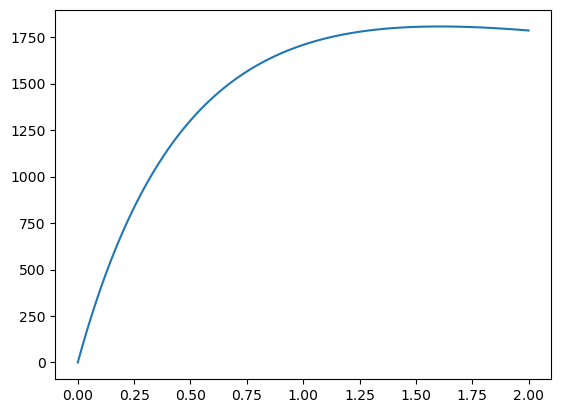

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def dA_of_z_( z, H0, Om, Ol ):
    """Angular diameter distance to redshift z in Mpc"""
# H0=H0 in km/s/Mpc, Om=Ωm, Ol=ΩΛ

    def E_z( zp ): # E(z) = H(z)/H0
        return np.sqrt(Om*(1+zp)**3 + Ol + Ok*(1+zp)**2)

    dH = 4428.24901 * (67.7 / H0)
    Ok = 1 - Om - Ol # Ωk
    dC, _ = quad( lambda zp: 1 / E_z( zp ), 0, z ) # dC /dH

    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok < 0.0:
        Sk = 1/np.sqrt(-Ok) * np.sin( np.sqrt(-Ok) * dC )
    elif Ok > 0.0:
        Sk = 1/np.sqrt(Ok) * np.sinh( np.sqrt(Ok) * dC )
    return dH * Sk / (1+z)

# vectorize the function so that it can be called with arrays as argument for z
dA_of_z = np.vectorize( dA_of_z_, excluded=[1,2,3] )
z = np.linspace(0, 2, 100) # create an array of 100 redshifts between 0 and 2
dA = dA_of_z( z, 67.7, 0.3, 0.7 ) # compute dA for the given cosmology for all z at once

plt.plot( z, dA )

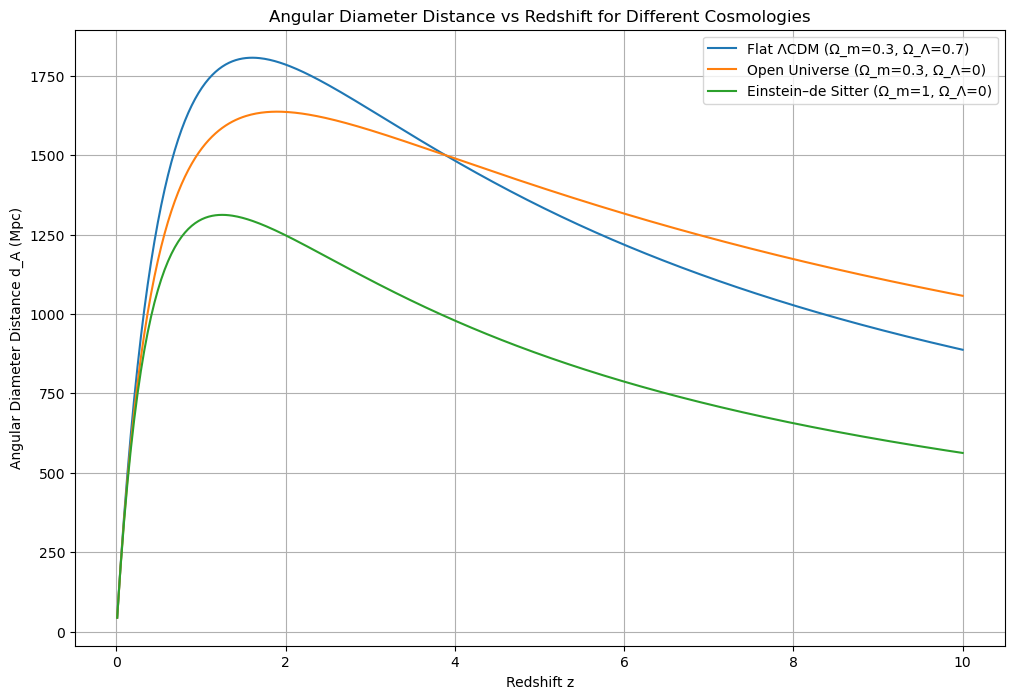

In [9]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def dA_of_z_( z, H0, Om, Ol ):
    """Angular diameter distance to redshift z in Mpc"""
    # H0 in km/s/Mpc, Om=Omega_matter, Ol=Omega_Lambda
    def E_z( zp ):  # E(z) = H(z)/H0
        return np.sqrt(Om*(1+zp)**3 + Ol + Ok*(1+zp)**2)
    
    dH = 2997.92458 / (H0/100.0)  # Hubble distance in Mpc
    Ok = 1.0 - Om - Ol            # Omega_k (curvature)
    integral, _ = quad(lambda zp: 1.0 / E_z(zp), 0, z)
    dC = dH * integral            # Comoving distance
    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok > 0.0:
        Sk = dH / np.sqrt(Ok) * np.sinh(np.sqrt(Ok) * dC / dH)
    else:
        Sk = dH / np.sqrt(-Ok) * np.sin(np.sqrt(-Ok) * dC / dH)
    dA = Sk / (1+z)
    return dA

# Vectorize the function to accept array inputs for z
dA_of_z = np.vectorize(dA_of_z_, excluded=[1,2,3])

# z range
z = np.linspace(0.01, 10, 500)

# Standard flat universe (ΛCDM)
H0_1, Om_1, Ol_1 = 67.7, 0.3, 0.7
dA1 = dA_of_z(z, H0_1, Om_1, Ol_1)

# Open universe (Ω_m=0.3, Ω_Λ=0)
H0_2, Om_2, Ol_2 = 67.7, 0.3, 0.0
dA2 = dA_of_z(z, H0_2, Om_2, Ol_2)

# Einstein–de Sitter universe (Ω_m=1, Ω_Λ=0)
H0_3, Om_3, Ol_3 = 67.7, 1.0, 0.0
dA3 = dA_of_z(z, H0_3, Om_3, Ol_3)

plt.figure(figsize=(12, 8))
plt.plot(z, dA1, label='Flat ΛCDM (Ω_m=0.3, Ω_Λ=0.7)')
plt.plot(z, dA2, label='Open Universe (Ω_m=0.3, Ω_Λ=0)')
plt.plot(z, dA3, label='Einstein–de Sitter (Ω_m=1, Ω_Λ=0)')
plt.xlabel('Redshift z')
plt.ylabel('Angular Diameter Distance d_A (Mpc)')
plt.title('Angular Diameter Distance vs Redshift for Different Cosmologies')
plt.legend()
plt.grid(True)

plt.show()


There is no monotonous increase in general. The function reaches its peak around z≈2 and then falls off.

#### Part 2. What is the angle subtended by a galaxy of physical diameter of D = 10 kpc at z = 1, and z = 3 in our ΛCDM cosmology?


### Angular Size Formula

$\theta = \frac{D}{d_A(z)}$

### Converting Radians to Arcseconds

$\theta_{\text{arcsec}} = \theta \times 206265$

### Combined Formula

$\theta_{\text{arcsec}} = \left( \frac{D}{d_A(z)} \right) \times 206265$

In [15]:
from scipy.integrate import quad
import numpy as np

def dA_of_z_( z, H0, Om, Ol ):
    """Angular diameter distance to redshift z in Mpc"""
    # H0=$H_0$ in km/s/Mpc, Om=$\Omega_m$, Ol=$\Omega_\Lambda$
    Ok = 1 - Om - Ol  # $\Omega_k$
    def E_z( zp ):  # $E(z) = H(z)/H_0$
        return np.sqrt(Om*(1+zp)**3 + Ol + Ok*(1+zp)**2)
    dH = 4428.24901 * (67.7 / H0)  # Hubble distance in Mpc
    dC, _ = quad( lambda zp: 1 / E_z( zp ), 0, z )  # $d_C / d_H$
    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok < 0.0:
        Sk = 1/np.sqrt(-Ok) * np.sin( np.sqrt(-Ok) * dC )
    elif Ok > 0.0:
        Sk = 1/np.sqrt(Ok) * np.sinh( np.sqrt(Ok) * dC )
    return dH * Sk / (1+z)

#  ΛCDM universe
H0, Om, Ol = 67.7, 0.3, 0.7


D = 10  # kpc

z_values = [1, 3]

for z in z_values:
    dA = dA_of_z_( z, H0, Om, Ol ) * 1e3  # Convert dA from Mpc to kpc
    theta_rad = D / dA  # Angular size in radians
    theta_arcsec = theta_rad * (206265)  # Convert radians to arcseconds
    print(f"At z = {z}, angular size θ = {theta_arcsec:.4f} arcseconds")


At z = 1, angular size θ = 1.2076 arcseconds
At z = 3, angular size θ = 1.2555 arcseconds


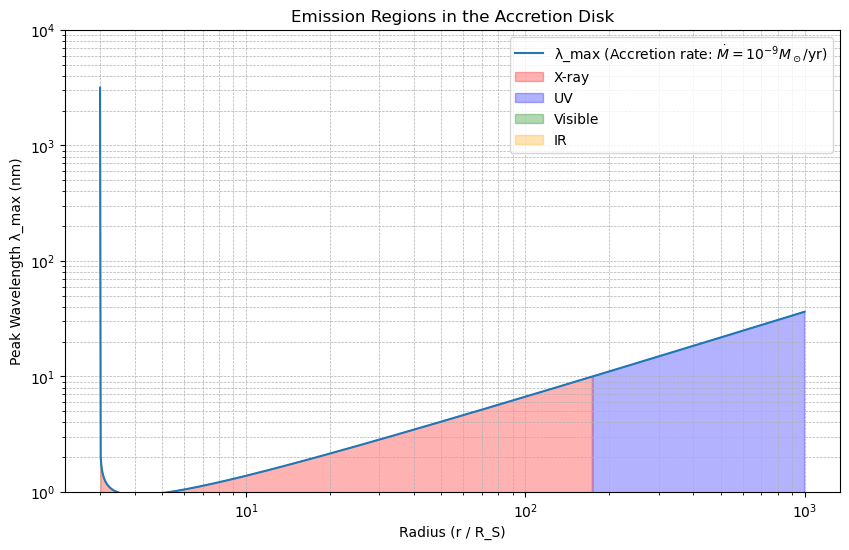

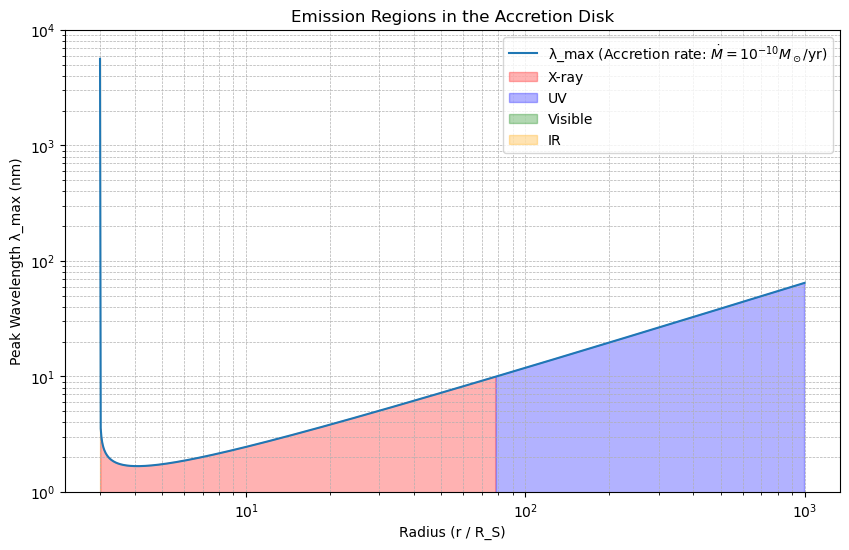


Emission regions for $\dot{M} = 10^{-9} M_\odot/\mathrm{yr}$:
  X-ray: 3.02e+00 R_S to 1.74e+02 R_S
  UV: 1.75e+02 R_S to 1.00e+03 R_S
  Visible: No regions
  IR: 3.00e+00 R_S to 3.00e+00 R_S

Emission regions for $\dot{M} = 10^{-10} M_\odot/\mathrm{yr}$:
  X-ray: 3.02e+00 R_S to 7.83e+01 R_S
  UV: 7.88e+01 R_S to 1.00e+03 R_S
  Visible: No regions
  IR: 3.00e+00 R_S to 3.00e+00 R_S


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Define Physical Constants
# ----------------------------
G = 6.67430e-11          # Gravitational constant (m^3 kg^-1 s^-2)
c = 3.0e8                # Speed of light (m/s)
sigma = 5.67e-8          # Stefan-Boltzmann constant (W m^-2 K^-4)
b_wien = 2.90e-3         # Wien's displacement constant (m K)
M_sun = 1.98847e30       # Solar mass (kg)
year = 3.154e7            # Seconds in a year (s)

# ----------------------------
# 2. Define Parameters
# ----------------------------
M = 4 * M_sun            # Mass of the black hole (kg)
Mdot_high = 1e-9 * M_sun / year  # Accretion rate 1e-9 M_sun/yr (kg/s)
Mdot_low = 1e-10 * M_sun / year  # Accretion rate 1e-10 M_sun/yr (kg/s)

# ----------------------------
# 3. Calculate Schwarzschild Radius and Inner Radius
# ----------------------------
RS = 2 * G * M / c**2     # Schwarzschild radius (m)
r_star = 3 * RS           # Inner radius (ISCO for Schwarzschild BH) (m)

# ----------------------------
# 4. Define Radial Grid
# ----------------------------
r_min = r_star            # Minimum radius (m)
r_max = 1000 * RS         # Maximum radius (m)
N = 1000                  # Number of radial points
r = np.logspace(np.log10(r_min), np.log10(r_max), N)  # Radial grid (m)

# ----------------------------
# 5. Temperature Structure Function
# ----------------------------
def temperature(r, M, Mdot, r_star, G, sigma):
    """
    Calculate the temperature T(r) of the accretion disk at radius r.
    
    Parameters:
    - r: Radial distance array (m)
    - M: Mass of the black hole (kg)
    - Mdot: Accretion rate (kg/s)
    - r_star: Inner radius (m)
    - G: Gravitational constant (m^3 kg^-1 s^-2)
    - sigma: Stefan-Boltzmann constant (W m^-2 K^-4)
    
    Returns:
    - T: Temperature array (K)
    """
    term1 = (3 * G * M * Mdot) / (8 * np.pi * sigma * r**3)
    term2 = 1 - np.sqrt(r_star / r)
    T = (term1 * term2)**0.25
    return T

# Calculate temperatures for both accretion rates
T_high = temperature(r, M, Mdot_high, r_star, G, sigma)
T_low = temperature(r, M, Mdot_low, r_star, G, sigma)

# ----------------------------
# 6. Wien's Displacement Law Function
# ----------------------------
def lambda_max(T, b_wien):
    """
    Calculate the peak emission wavelength lambda_max using Wien's displacement law.
    
    Parameters:
    - T: Temperature array (K)
    - b_wien: Wien's displacement constant (m K)
    
    Returns:
    - lambda_max: Peak emission wavelength array (m)
    """
    return b_wien / T

# Calculate peak wavelengths
lambda_max_high = lambda_max(T_high, b_wien)
lambda_max_low = lambda_max(T_low, b_wien)

# Convert wavelengths to nanometers for better readability
lambda_max_high_nm = lambda_max_high * 1e9  # meters to nanometers
lambda_max_low_nm = lambda_max_low * 1e9    # meters to nanometers

# ----------------------------
# 7. Identify Emission Regions
# ----------------------------
def emission_type(lambda_max_nm):
    """
    Determine the emission type based on peak wavelength.
    
    Parameters:
    - lambda_max_nm: Peak emission wavelength array (nm)
    
    Returns:
    - emission: Array of emission types ('X-ray', 'UV', 'Visible', 'IR')
    """
    emission = np.full_like(lambda_max_nm, 'IR', dtype=object)  # Default to IR
    emission[lambda_max_nm < 10] = 'X-ray'
    emission[(lambda_max_nm >= 10) & (lambda_max_nm < 400)] = 'UV'
    emission[(lambda_max_nm >= 400) & (lambda_max_nm < 700)] = 'Visible'
    return emission

# Determine emission types
emission_high = emission_type(lambda_max_high_nm)
emission_low = emission_type(lambda_max_low_nm)

# ----------------------------
# 8. Visualization
# ----------------------------
import matplotlib.colors as mcolors

# Define color mapping for emission types
colors = {'X-ray': 'red', 'UV': 'blue', 'Visible': 'green', 'IR': 'orange'}
cmap = mcolors.ListedColormap(['red', 'blue', 'green', 'orange'])
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Function to map emission types to colors
def map_colors(emission):
    return np.array([colors[em] for em in emission])

# Plotting function
def plot_emission(r, lambda_max_nm, emission, accretion_rate_label):
    """
    Plot the peak emission wavelength with emission regions colored.
    
    Parameters:
    - r: Radial distance array (m)
    - lambda_max_nm: Peak emission wavelength array (nm)
    - emission: Array of emission types
    - accretion_rate_label: Label for the accretion rate
    """
    plt.figure(figsize=(10, 6))
    plt.plot(r / RS, lambda_max_nm, label=f'λ_max (Accretion rate: {accretion_rate_label})')
    
    # Highlight emission regions
    for em_type, color in colors.items():
        mask = emission == em_type
        plt.fill_between(r / RS, lambda_max_nm, where=mask, color=color, alpha=0.3, label=em_type)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radius (r / R_S)')
    plt.ylabel('Peak Wavelength λ_max (nm)')
    plt.title('Emission Regions in the Accretion Disk')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.ylim(1, 1e4)
    plt.show()

# Plot for high accretion rate
plot_emission(r, lambda_max_high_nm, emission_high, r'$\dot{M} = 10^{-9} M_\odot/\mathrm{yr}$')

# Plot for low accretion rate
plot_emission(r, lambda_max_low_nm, emission_low, r'$\dot{M} = 10^{-10} M_\odot/\mathrm{yr}$')

# ----------------------------
# 9. Identify and Print Regions
# ----------------------------
def print_emission_regions(r, emission, accretion_rate_label):
    """
    Print the radial ranges for each emission type.
    
    Parameters:
    - r: Radial distance array (m)
    - emission: Array of emission types
    - accretion_rate_label: Label for the accretion rate
    """
    print(f"\nEmission regions for {accretion_rate_label}:")
    for em_type in ['X-ray', 'UV', 'Visible', 'IR']:
        mask = emission == em_type
        if np.any(mask):
            r_min_em = r[mask].min() / RS
            r_max_em = r[mask].max() / RS
            print(f"  {em_type}: {r_min_em:.2e} R_S to {r_max_em:.2e} R_S")
        else:
            print(f"  {em_type}: No regions")

# Print emission regions for both accretion rates
print_emission_regions(r, emission_high, r'$\dot{M} = 10^{-9} M_\odot/\mathrm{yr}$')
print_emission_regions(r, emission_low, r'$\dot{M} = 10^{-10} M_\odot/\mathrm{yr}$')


/tmp/ipykernel_1456/3969177690.py:27: RuntimeWarning: divide by zero encountered in divide
  return b / T


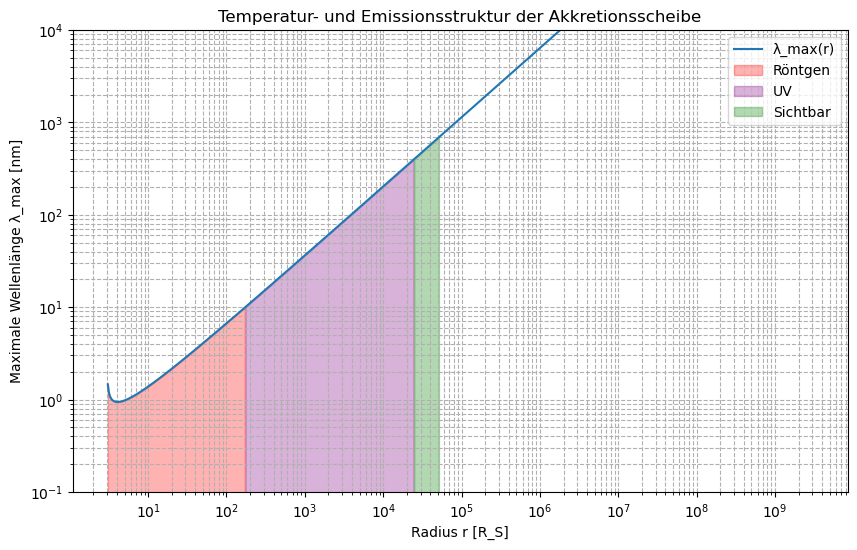

Röntgen-Emission zwischen:
Innerer Radius: 3.06e+00 R_S
Äußerer Radius: 1.71e+02 R_S

UV-Emission zwischen:
Innerer Radius: 1.75e+02 R_S
Äußerer Radius: 2.44e+04 R_S

Sichtbar-Emission zwischen:
Innerer Radius: 2.49e+04 R_S
Äußerer Radius: 5.14e+04 R_S

Mit niedrigerer Akkretionsrate:
Röntgen-Emission zwischen:
Innerer Radius: 3.06e+00 R_S
Äußerer Radius: 7.79e+01 R_S

UV-Emission zwischen:
Innerer Radius: 7.95e+01 R_S
Äußerer Radius: 1.13e+04 R_S

Sichtbar-Emission zwischen:
Innerer Radius: 1.16e+04 R_S
Äußerer Radius: 2.39e+04 R_S



In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Physikalische Konstanten
G = 6.67430e-11         # Gravitationskonstante in m^3 kg^-1 s^-2
c = 299792458           # Lichtgeschwindigkeit in m/s
sigma_r = 5.670374419e-8  # Stefan-Boltzmann-Konstante in W m^-2 K^-4
b = 2.897771955e-3      # Wien'sche Verschiebungskonstante in m K
M_sun = 1.98847e30      # Sonnenmasse in kg
year = 3.154e7          # Sekunden pro Jahr

# Gegebene Parameter
M = 4 * M_sun               # Masse des Schwarzen Lochs in kg
Mdot = 1e-9 * M_sun / year  # Akkretionsrate in kg/s

# Schwarzschild-Radius und innerer Radius
R_S = 2 * G * M / c**2      # Schwarzschild-Radius in Metern
r_star = 3 * R_S            # ISCO bei 3 R_S

# Funktionen für Temperatur und Wellenlänge
def T(r, M, Mdot, r_star):
    term1 = (3 * G * M * Mdot) / (8 * np.pi * sigma_r * r**3)
    term2 = 1 - np.sqrt(r_star / r)
    return (term1 * term2)**0.25

def lambda_max(T):
    return b / T

# Wellenlängenbereiche
lambda_xray = 10e-9       # <10 nm für Röntgenstrahlung
lambda_uv = 400e-9        # 10 nm - 400 nm für UV
lambda_visible = 700e-9   # 400 nm - 700 nm für sichtbares Licht

# Radiusbereich
r = np.logspace(np.log10(r_star), np.log10(1e9 * r_star), 1000)

# Temperatur und Wellenlänge berechnen
T_r = T(r, M, Mdot, r_star)
lambda_r = lambda_max(T_r)

# Emissionsregionen identifizieren
idx_xray = np.where(lambda_r < lambda_xray)[0]
idx_uv = np.where((lambda_r >= lambda_xray) & (lambda_r < lambda_uv))[0]
idx_visible = np.where((lambda_r >= lambda_uv) & (lambda_r <= lambda_visible))[0]

r_xray = r[idx_xray]
r_uv = r[idx_uv]
r_visible = r[idx_visible]

# Ergebnisse plotten
plt.figure(figsize=(10, 6))
plt.loglog(r / R_S, lambda_r * 1e9, label='λ_max(r)')

if len(r_xray) > 0:
    plt.fill_between(r_xray / R_S, lambda_r[idx_xray] * 1e9, y2=1e-2, color='red', alpha=0.3, label='Röntgen')
if len(r_uv) > 0:
    plt.fill_between(r_uv / R_S, lambda_r[idx_uv] * 1e9, y2=1e-2, color='purple', alpha=0.3, label='UV')
if len(r_visible) > 0:
    plt.fill_between(r_visible / R_S, lambda_r[idx_visible] * 1e9, y2=1e-2, color='green', alpha=0.3, label='Sichtbar')

plt.xlabel('Radius r [R_S]')
plt.ylabel('Maximale Wellenlänge λ_max [nm]')
plt.title('Temperatur- und Emissionsstruktur der Akkretionsscheibe')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.ylim(1e-1, 1e4)
plt.show()

# Ergebnisse ausgeben
def print_region(name, r_region):
    if len(r_region) > 0:
        print(f"{name}-Emission zwischen:")
        print(f"Innerer Radius: {r_region[0] / R_S:.2e} R_S")
        print(f"Äußerer Radius: {r_region[-1] / R_S:.2e} R_S\n")
    else:
        print(f"Keine {name}-Emission in diesem Modell.\n")

print_region('Röntgen', r_xray)
print_region('UV', r_uv)
print_region('Sichtbar', r_visible)

# Niedrigere Akkretionsrate untersuchen
Mdot_lower = 1e-10 * M_sun / year

T_r_lower = T(r, M, Mdot_lower, r_star)
lambda_r_lower = lambda_max(T_r_lower)

idx_xray_lower = np.where(lambda_r_lower < lambda_xray)[0]
idx_uv_lower = np.where((lambda_r_lower >= lambda_xray) & (lambda_r_lower < lambda_uv))[0]
idx_visible_lower = np.where((lambda_r_lower >= lambda_uv) & (lambda_r_lower <= lambda_visible))[0]

r_xray_lower = r[idx_xray_lower]
r_uv_lower = r[idx_uv_lower]
r_visible_lower = r[idx_visible_lower]

print("Mit niedrigerer Akkretionsrate:")
print_region('Röntgen', r_xray_lower)
print_region('UV', r_uv_lower)
print_region('Sichtbar', r_visible_lower)
